# Objective: Perform a geographical analysis of the restaurants in the dataset.

Loading data and python environment needed

In [ ]:
import pandas as pd
import folium  # For map visualization : interactive maps
import matplotlib.pyplot as plt  # For chart vizualization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data_cognifyz/Dataset .csv')


In [ ]:
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

# Exploring the attributes : longitute and latitude

In [ ]:
print(df[['Latitude', 'Longitude']].describe())  # Descriptive statistics

          Latitude    Longitude
count  9551.000000  9551.000000
mean     25.854381    64.126574
std      11.007935    41.467058
min     -41.330428  -157.948486
25%      28.478713    77.081343
50%      28.570469    77.191964
75%      28.642758    77.282006
max      55.976980   174.832089


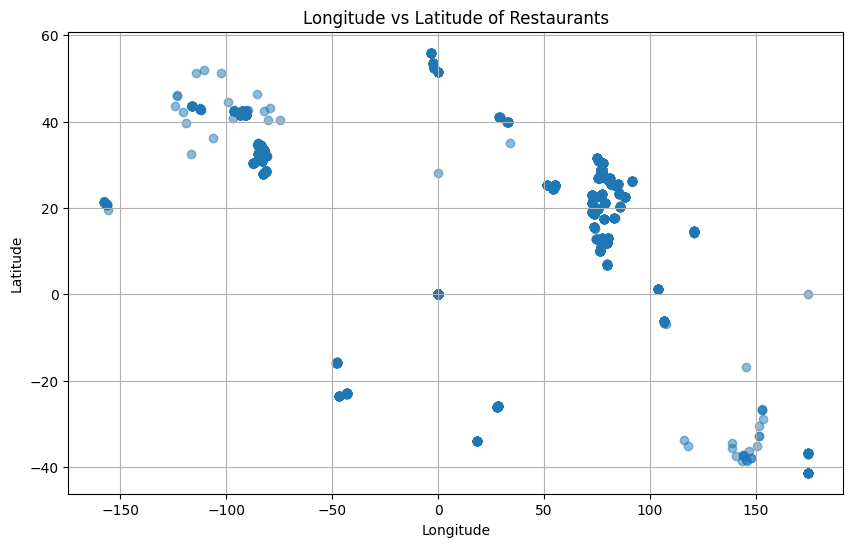

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.5)
plt.title('Longitude vs Latitude of Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

# 1.2 ) Visualizing Restaurant Distribution on a Map

In [ ]:

m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=10)
for i, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], tooltip=f"{row['Restaurant Name']}")\
        .add_to(m)
folium.LayerControl().add_to(m)
m

# Analysis of concentration of resturants in diff areas.

In [ ]:
#grouping resturants by city :
restaurant_counts = df['City'].value_counts().sort_values(ascending=False)
#taking out first 15 cities that have most resturants for ease of vizualization and analysis
restaurant_counts_1 = pd.DataFrame(df['City'].value_counts().sort_values(ascending=False)[:15])
print(f"Top 5 Cities/Localities with most restaurants:\n{restaurant_counts.head()}")

Top 5 Cities/Localities with most restaurants:
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: City, dtype: int64


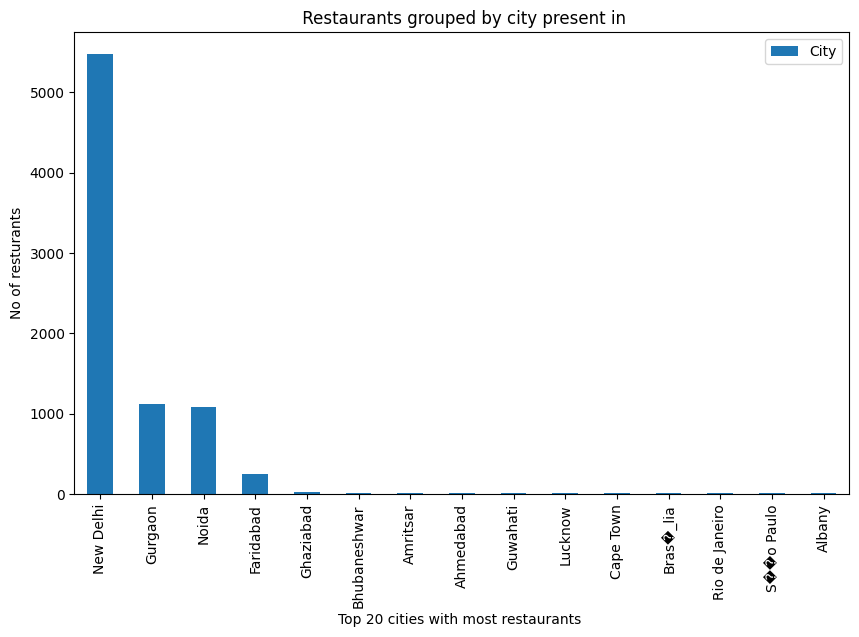

In [ ]:
#plotting the analysis for top 15 cities:
import seaborn as sns
restaurant_counts_1.plot(kind='bar',figsize=(10,6))
plt.title(' Restaurants grouped by city present in')
plt.xlabel('Top 20 cities with most restaurants ')
plt.ylabel('No of resturants')
plt.show()


In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df['Cuisines'] = imputer.fit_transform(df[['Cuisines']])
df['Cuisines']=df['Cuisines'].apply(lambda x: x.split(','))


Location grouping

In [ ]:

df_1 = df.copy()

In [ ]:
location_count = dict(df_1['Address'].value_counts().sort_values(ascending=False)[:15])
print(location_count)

{'Dilli Haat, INA, New Delhi': 11, 'Sector 41, Noida': 11, 'Greater Kailash (GK) 1, New Delhi': 10, 'The Imperial, Janpath, New Delhi': 9, 'Cyber Hub, DLF Cyber City, Gurgaon': 8, 'Food Court, 3rd Floor, Logix City Centre, Sector 32, Near Sector 34, Noida': 8, 'HUDA Market, Sector 56, Gurgaon': 8, 'Palate of Delhi, Dhaula Kuan Metro Station, Chanakyapuri, New Delhi': 8, 'The Lalit, Barakhamba Avenue, Barakhamba Road, New Delhi': 8, 'Unitech Infospace, Sector 21, Gurgaon': 7, 'DLF Phase 1, Gurgaon': 7, 'The Taj Mahal Hotel, 1, Mansingh Road, New Delhi': 7, 'Main Market, Ghitorni, MG Road, New Delhi': 7, '3rd Floor, DLF Mall of India, Sector 18, Noida': 7, 'Le Meridien, Windsor Place, Janpath, New Delhi': 6}


In [ ]:
locality_count = dict(df_1['Locality'].value_counts().sort_values(ascending=False)[:25])
print(locality_count)

{'Connaught Place': 122, 'Rajouri Garden': 99, 'Shahdara': 87, 'Defence Colony': 86, 'Malviya Nagar': 85, 'Pitampura': 85, 'Mayur Vihar Phase 1': 84, 'Rajinder Nagar': 81, 'Safdarjung': 80, 'Satyaniketan': 79, 'Krishna Nagar': 77, 'Karol Bagh': 76, 'Sector 62': 76, 'Sector 18': 75, 'Hauz Khas': 74, 'Kalkaji': 73, 'Sector 15': 71, 'DLF Phase 3': 69, 'Mahipalpur': 69, 'Mukherjee Nagar': 68, 'Shalimar Bagh': 67, 'Chandni Chowk': 67, 'Greater Kailash (GK) 2': 66, 'Greater Kailash (GK) 1': 66, 'Kamla Nagar': 65}


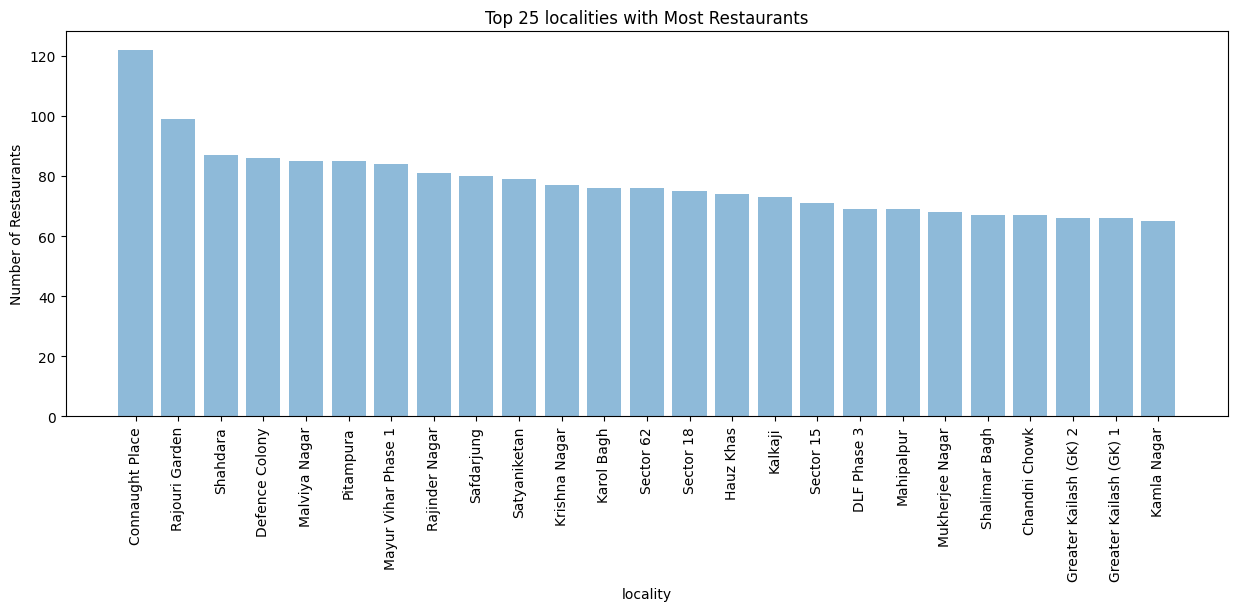

In [ ]:
#plotting the analysis for top 15 localities:
import seaborn as sns
import numpy as np

localities = list(locality_count.keys())
counts = list(locality_count.values())
y_pos = np.arange(len(localities))

plt.figure(figsize=(15, 5))
plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, localities, rotation=90)
plt.xlabel("locality")
plt.ylabel("Number of Restaurants")
plt.title("Top 25 localities with Most Restaurants")
plt.show()

# Calculating Statistics by City or Locality

In [ ]:
print(restaurant_counts_1)

                City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Guwahati          21
Lucknow           21
Cape Town         20
Bras�_lia         20
Rio de Janeiro    20
S��o Paulo        20
Albany            20


In [ ]:
restaurants_by_location = df_1.groupby('City')
restaurant_count_by_location = restaurants_by_location.size().reset_index(name='restaurant_count')
restaurant_count_by_location = pd.DataFrame(restaurant_count_by_location.sort_values(by='restaurant_count', ascending=False)[:15])
restaurant_count_by_location.shape

(15, 2)

In [ ]:
df_1.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
#Calculate average ratings by city
average_ratings_by_location = restaurants_by_location['Aggregate rating'].mean().reset_index(name='average_rating')
#Calculate popular cuisines by city
popular_cuisines_by_location = restaurants_by_location['Cuisines'].apply(lambda x: x.mode()).reset_index(name='popular_cuisine')
#Merging average ratings and popular cuisines into one DataFrame
stats_by_location = pd.DataFrame(pd.merge(average_ratings_by_location, popular_cuisines_by_location, on='City'))
#Displaying the statistics
print(stats_by_location)

                City  average_rating  level_1  \
0          Abu Dhabi        4.300000        0   
1          Abu Dhabi        4.300000        1   
2          Abu Dhabi        4.300000        2   
3               Agra        3.965000        0   
4          Ahmedabad        4.161905        0   
..               ...             ...      ...   
416          Weirton        3.900000        0   
417  Wellington City        4.250000        0   
418   Winchester Bay        3.200000        0   
419          Yorkton        3.300000        0   
420        ��stanbul        4.292857        0   

                                       popular_cuisine  
0                                           [American]  
1                                             [Indian]  
2                                    [Italian,  Pizza]  
3                             [North Indian,  Mughlai]  
4    [Cafe,  American,  Continental,  Armenian,  Fa...  
..                                                 ...  
416         

In [ ]:
stats_by_location = pd.DataFrame(pd.merge(average_ratings_by_location, popular_cuisines_by_location, on='City'))
stats_by_location.shape

(421, 4)

In [ ]:
stats_by_location.columns

Index(['City', 'average_rating', 'level_1', 'popular_cuisine'], dtype='object')

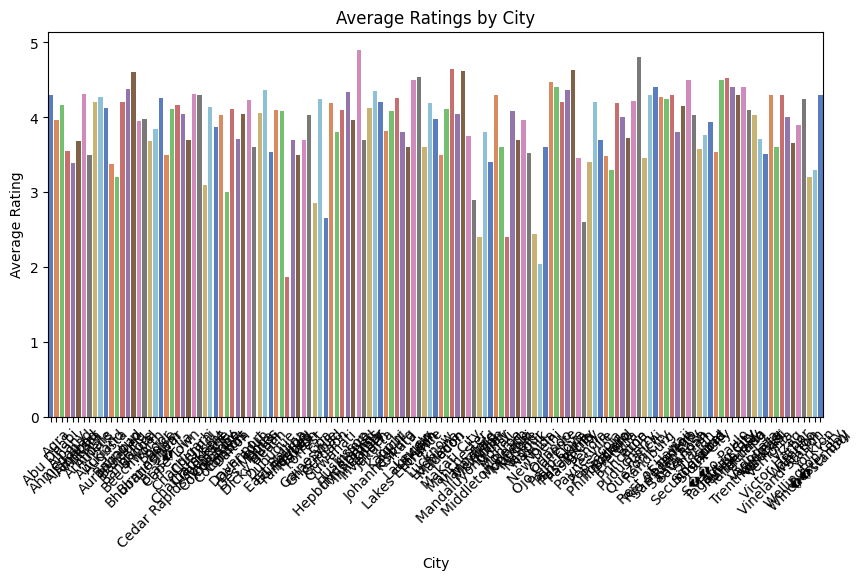

In [ ]:

plt.figure(figsize=(10, 5))
sns.barplot(x='City', y='average_rating', data=stats_by_location, palette='muted', hue='City', legend=False)
plt.title('Average Ratings by City')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

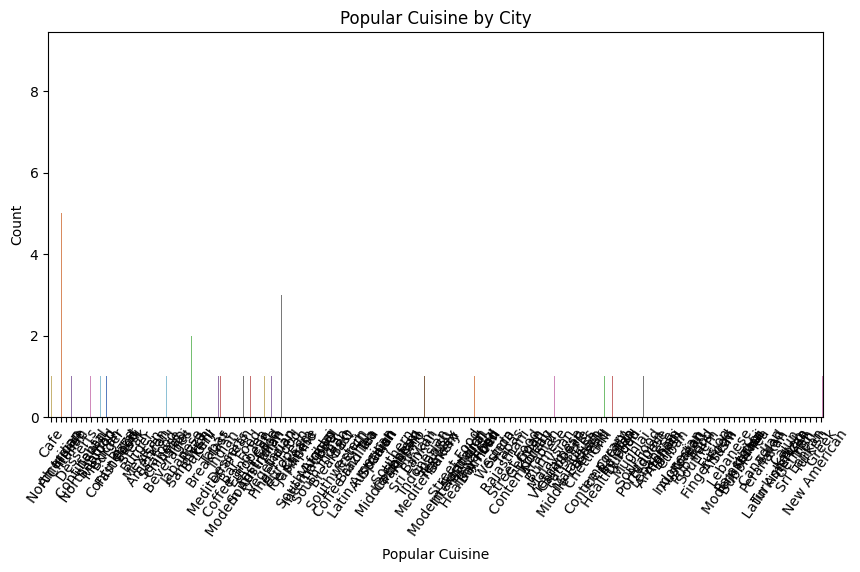

In [ ]:
#Plotting popular cuisines
stats_by_location = stats_by_location.explode('popular_cuisine')

# Plotting popular cuisines
plt.figure(figsize=(10, 5))
sns.countplot(x='popular_cuisine', data=stats_by_location, palette='muted',hue='City', legend=False, order=stats_by_location['popular_cuisine'].value_counts().index)
plt.title('Popular Cuisine by City')
plt.xlabel('Popular Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=55)
plt.show()


# Concluding Inshights :
This task marks my 3rd and last task as an ML intern at cognifyz.
Following are the inshights from the above analysis of Restaurant dataset:
1)Top 3 cities with most restaurant are:
New Delhi - 5473 , Gurgaon - 1118 ,Noida - 1080
2)Top 3 localities with most restaurant are:
Connaught Place': 122, 'Rajouri Garden': 99, 'Shahdara': 87
3)The most popular cuisine was North Indian